<h1>IBM Data Science Capstone Project</h1>
<p><b>Assessment on best area to open a restaurant in Kuala Lumpur, Malaysia</b></p>

## Table of contents
* [Introduction and Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

<h3>1.0 Introduction and Business Problem</h3>

<b>1.1 Background</b><br>
Malaysian cuisine consists of cooking traditions and practices found in Malaysia, and reflects the multi-ethnic makeup of its population. The vast majority of Malaysia's population can roughly be divided among three major ethnic groups: Malays, Chinese and Indians. The remainder consists of the indigenous peoples of Sabah and Sarawak in East Malaysia, the Orang Asli of Peninsular Malaysia, the Peranakan and Eurasian creole communities, as well as a significant number of foreign workers and expatriates.
<br><br>
As a result of historical migrations, colonisation by foreign powers, and its geographical position within its wider home region, Malaysia's culinary style in the present day is primarily a melange of traditions from its Malay, Chinese, Indian, Indonesian and ethnic Bornean citizens, with heavy to light influences from Thai, Portuguese, Dutch, Arabian cuisines and British cuisines, to name a few. This resulted in a symphony of flavours, making Malaysian cuisine highly complex and diverse. The condiments and spices used in cooking varies as the land is blessed with these natural resources that brings bursting flavours in the outcome of meal preparation.
<br><br><b>1.2 Problem</b><br>
As one of the region’s major destinations for food, it should not be a surprise that many want to start a restaurant in Malaysia. Malaysia is globally known as a paradise for food lovers. Both locals and tourists alike can enjoy a selection from an extensive menu from the country’s multicultural society.Setting up a restaurant in Malaysia can sometimes be an expensive and difficult process as it involves getting the business incorporated, <b>finding a suitable location</b>, choosing a menu that can help the restaurant survive the competition, and many other elements. If one can overcome these hassles properly, then the owner will find it a profitable and lucrative business opportunity in Malaysia.<br><br>
With many restaurant scattered around Kuala Lumpur, the major problem is on the identification of the best place to set up a restaurant so that it will maximize footfall and increase revenue.
<br><br><b>1.3 Target Audience / Interest</b><br>
This analysis is intended for food entrepreneur or restaurant operator to help with identification of areas that will be the best to open/start a restaurant so that this will help them minimize the risk of failure.

<h3>2.0 Data</h3>

<b>2.1 Data Sources</b><br>
To work on this study, we will gather data from internet the following <b>features</b>:
<ul>
    <li><b>Kuala Lumpur Data:</b>
    <ul>
        <li><b>Area</b>: Name of the area</li>
        <li><b>Population</b>: No of population in the area</li>
        <li><b>Area Size</b>: Area size in km2</li>
        <li><b>Ethnic Mix</b>: Percentage of ethnic mix in the area</li>
        <li><b>Lat & Long</b>: Lat & Long of the area</li>
    </ul><br>
    <li><b>Kuala Lumpur Restaurant Data:</b></li>
    <ul>
        <li><b>Area</b>: Name of the area</li>
        <li><b>No of Restaurant</b>: No of Restaurant in specific area</li>
    </ul>
</ul>
Based on this information, we will then create an analysis to determine the no of restaurant in an area vs its population density to arrive at the point whether its over-served or under-served. We will also look at type of restaurant in the area understand competitive landscape.

<b>2.2 Data Wrangling & Cleaning</b><br>

In [1]:
#import module
import pandas as pd
import numpy as np
print('Module imported')

Module imported


<b>2.2.1 Import Area and Restaurant Data</b>

In [2]:
#Import Area Data from CSV
path = 'KL_Data.csv'
kl_data = pd.read_csv(path)
kl_data.set_index('Area', inplace = True)
kl_data

,Population,Area Size (km2),Malay,Chinese,Indian,Others,Lat,Long
Area,,,,,,,,
Bandar Tun Razak,83650,25,0.6108,0.2910,0.0827,0.0155,3.0920,101.72110
Batu,76328,20,0.4252,0.3828,0.1764,0.0156,2.7023,101.54750
Bukit Bintang,69526,21,0.1253,0.7512,0.1095,0.0140,3.1468,101.71130
Cheras,78819,16,0.0968,0.8293,0.0673,0.0066,3.0685,101.77040
Kepong,72696,12,0.0455,0.8876,0.0603,0.0066,3.2140,101.63560
Lembah Pantai,80346,20,0.6212,0.1891,0.1624,0.0273,3.1225,101.66449
Segambut,77956,51,0.5893,0.2753,0.1177,0.0177,3.1917,101.67340
Seputeh,86256,31,0.8203,0.0904,0.0787,0.0106,3.1150,101.67970
Setiawangsa,72136,16,0.6109,0.2587,0.1038,0.0266,3.1830,101.74620


In [3]:
#Import Restaurant Data from CSV
path2 = 'KL_Restaurant_Data.csv'
kl_restaurant_data = pd.read_csv(path2)
kl_restaurant_data.set_index('Area', inplace = True)
kl_restaurant_data

,No of Restaurant
Area,
Bandar Tun Razak,103
Batu,78
Bukit Bintang,53
Cheras,88
Kepong,55
Lembah Pantai,69
Segambut,74
Seputeh,65
Setiawangsa,89


<b>2.2.2 Data Cleaning & Wrangling</b>

<b>Define Radius for each Kuala Lumpur areas</b>

In [4]:
#Define radius for each city by taking area size divide by 2
radius = pd.DataFrame(kl_data['Area Size (km2)']/2*1000)
kl_data['Radius'] = radius
kl_data

,Population,Area Size (km2),Malay,Chinese,Indian,Others,Lat,Long,Radius
Area,,,,,,,,,
Bandar Tun Razak,83650,25,0.6108,0.2910,0.0827,0.0155,3.0920,101.72110,12500.0
Batu,76328,20,0.4252,0.3828,0.1764,0.0156,2.7023,101.54750,10000.0
Bukit Bintang,69526,21,0.1253,0.7512,0.1095,0.0140,3.1468,101.71130,10500.0
Cheras,78819,16,0.0968,0.8293,0.0673,0.0066,3.0685,101.77040,8000.0
Kepong,72696,12,0.0455,0.8876,0.0603,0.0066,3.2140,101.63560,6000.0
Lembah Pantai,80346,20,0.6212,0.1891,0.1624,0.0273,3.1225,101.66449,10000.0
Segambut,77956,51,0.5893,0.2753,0.1177,0.0177,3.1917,101.67340,25500.0
Seputeh,86256,31,0.8203,0.0904,0.0787,0.0106,3.1150,101.67970,15500.0
Setiawangsa,72136,16,0.6109,0.2587,0.1038,0.0266,3.1830,101.74620,8000.0


<b>Define Population Density for each Kuala Lumpur areas</b>

In [5]:
#Define population density for each area by taking population and divide it by area size
d = (np.array(kl_data['Population']).astype(int)/np.array(kl_data['Area Size (km2)']).astype(int)).round(1)
kl_data['Density'] = d
kl_data

,Population,Area Size (km2),Malay,Chinese,Indian,Others,Lat,Long,Radius,Density
Area,,,,,,,,,,
Bandar Tun Razak,83650,25,0.6108,0.2910,0.0827,0.0155,3.0920,101.72110,12500.0,3346.0
Batu,76328,20,0.4252,0.3828,0.1764,0.0156,2.7023,101.54750,10000.0,3816.4
Bukit Bintang,69526,21,0.1253,0.7512,0.1095,0.0140,3.1468,101.71130,10500.0,3310.8
Cheras,78819,16,0.0968,0.8293,0.0673,0.0066,3.0685,101.77040,8000.0,4926.2
Kepong,72696,12,0.0455,0.8876,0.0603,0.0066,3.2140,101.63560,6000.0,6058.0
Lembah Pantai,80346,20,0.6212,0.1891,0.1624,0.0273,3.1225,101.66449,10000.0,4017.3
Segambut,77956,51,0.5893,0.2753,0.1177,0.0177,3.1917,101.67340,25500.0,1528.5
Seputeh,86256,31,0.8203,0.0904,0.0787,0.0106,3.1150,101.67970,15500.0,2782.5
Setiawangsa,72136,16,0.6109,0.2587,0.1038,0.0266,3.1830,101.74620,8000.0,4508.5


<b>Join Restaurant Data with Area Data</b>

In [6]:
#Join kl_data with kl_restaurant_data
combine_data = kl_data.join(kl_restaurant_data, on='Area')
combine_data

,Population,Area Size (km2),Malay,Chinese,Indian,Others,Lat,Long,Radius,Density,No of Restaurant
Area,,,,,,,,,,,
Bandar Tun Razak,83650,25,0.6108,0.2910,0.0827,0.0155,3.0920,101.72110,12500.0,3346.0,103
Batu,76328,20,0.4252,0.3828,0.1764,0.0156,2.7023,101.54750,10000.0,3816.4,78
Bukit Bintang,69526,21,0.1253,0.7512,0.1095,0.0140,3.1468,101.71130,10500.0,3310.8,53
Cheras,78819,16,0.0968,0.8293,0.0673,0.0066,3.0685,101.77040,8000.0,4926.2,88
Kepong,72696,12,0.0455,0.8876,0.0603,0.0066,3.2140,101.63560,6000.0,6058.0,55
Lembah Pantai,80346,20,0.6212,0.1891,0.1624,0.0273,3.1225,101.66449,10000.0,4017.3,69
Segambut,77956,51,0.5893,0.2753,0.1177,0.0177,3.1917,101.67340,25500.0,1528.5,74
Seputeh,86256,31,0.8203,0.0904,0.0787,0.0106,3.1150,101.67970,15500.0,2782.5,65
Setiawangsa,72136,16,0.6109,0.2587,0.1038,0.0266,3.1830,101.74620,8000.0,4508.5,89


<b>Preliminary Analysis on Data</b>

In [7]:
#Show Descriptive Analysis
print('Data Shape',combine_data.shape,'\n\nData Info')
print(combine_data.info())
print('\nData Statistics')
combine_data.describe()

Data Shape (11, 11) 

Data Info
<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, Bandar Tun Razak to Wangsa Maju
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Population        11 non-null     int64  
 1   Area Size (km2)   11 non-null     int64  
 2   Malay             11 non-null     float64
 3   Chinese           11 non-null     float64
 4   Indian            11 non-null     float64
 5   Others            11 non-null     float64
 6   Lat               11 non-null     float64
 7   Long              11 non-null     float64
 8   Radius            11 non-null     float64
 9   Density           11 non-null     float64
 10  No of Restaurant  11 non-null     int64  
dtypes: float64(8), int64(3)
memory usage: 1.0+ KB
None

Data Statistics


,Population,Area Size (km2),Malay,Chinese,Indian,Others,Lat,Long,Radius,Density,No of Restaurant
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,78030.090909,22.181818,0.477127,0.402191,0.103164,0.017518,3.110636,101.690372,11090.909091,4030.254545,76.181818
std,6226.013820,10.879505,0.266616,0.282094,0.037151,0.007990,0.143512,0.061509,5439.752668,1283.309457,15.568033
min,69526.000000,12.000000,0.045500,0.090400,0.060300,0.006600,2.702300,101.547500,6000.000000,1528.500000,53.000000
25%,72416.000000,16.000000,0.275250,0.223900,0.080250,0.012300,3.103500,101.668945,8000.000000,3328.400000,67.000000
50%,77956.000000,20.000000,0.598200,0.291000,0.094200,0.015600,3.146800,101.707700,10000.000000,4017.300000,74.000000
75%,81998.000000,23.000000,0.616050,0.567000,0.113600,0.025450,3.187350,101.728900,11500.000000,4717.350000,88.500000
max,88482.000000,51.000000,0.820300,0.887600,0.176400,0.027900,3.214000,101.770400,25500.000000,6058.000000,103.000000


<h3>3.0 Methodology</h3>

<b>Basis of Analysis</b><br>
In this project we will direct our efforts on detecting areas in Kuala Lumpur that have **high serving density (no of population over no of restaurant)**. This will give us the first indication that the area has higher demand vs supply.
<br><br>
Next, we will also look at areas in Kuala Lumpur with **low restaurant density (no of restaurant over area size)**. This will give us the next indication that the competition in the area are low and chances of survival will be high.
<br><br>
Lastly, we will identify type of restaurant that is suitable in the area by looking at population mix by race which will give indication of preference and proper target market (either by Malay, Chinese or Indian).
<br><br>
<b>Methodology</b><br>
In first step we have collected the required **data: area, population, size, population mix and join the data with no of restaurant within the area**
<br><br>
Second step in our analysis will be calculation and exploration of '**serving density**' across different areas of Kuala Lumpur. We will do the same for '**restaurant density**'.
<br><br>
In third step, we will combine both analysis to nail down the best area based on both analysis on the most promising areas. We will present map of all such locations based on ranking to identify areas that should be a starting point. Next, we will combine with population mix analysis to see the preference in the area that will give us indication for which type of restaurant to open in that area.

<h3>4.0 Analysis</h3>

In [8]:
#Import liabrary
import matplotlib as mpl
import matplotlib.pyplot as plt
print('Library Imported')

Library Imported


<b>4.1 Ranking Area by Serving Density Index</b><br>
First, let us see population in each area to identify area with the highest population

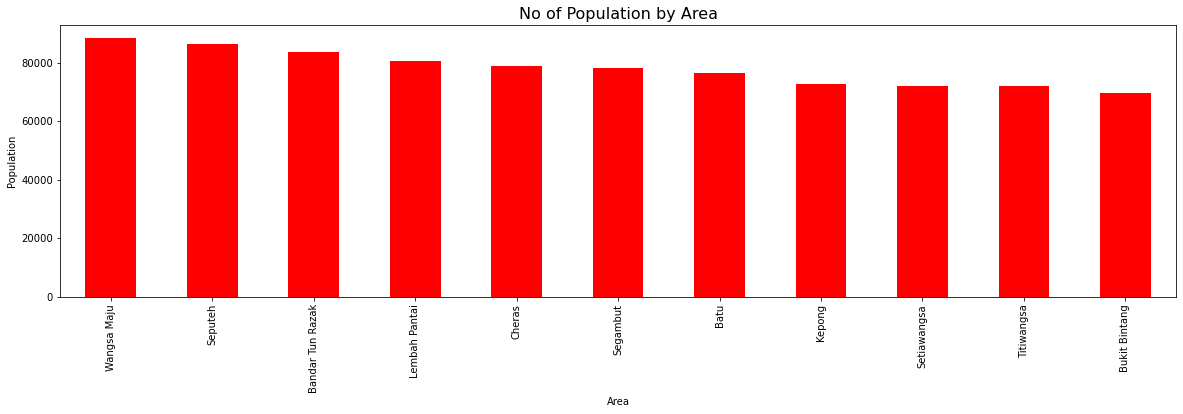

In [9]:
#Plot a bar chart showing population data by areas in decending fashion
combine_data = combine_data.sort_values('Population', ascending=False)
pop = combine_data['Population']
pop.plot(kind='bar', figsize = (20, 5), color ='red')
plt.title('No of Population by Area', size=16)
plt.ylabel('Population')
plt.show()

From the descriptive analysis, we can see that the area with highest no of population are Wangsa Maju, followed by Seputeh.

Next, let us see no of restaurant in each area to identify area with low no of restaurant

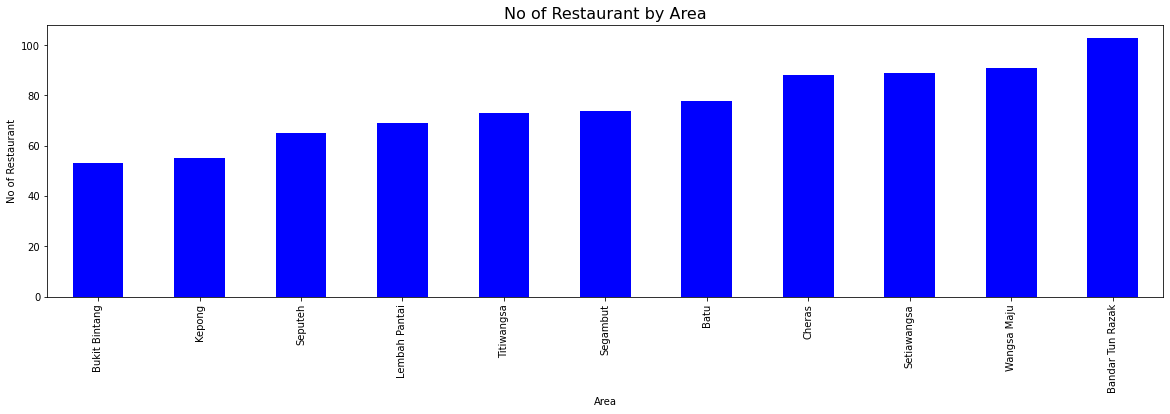

In [10]:
#Plot a bar chart showing restaurant data by areas in acending fashion
combine_data = combine_data.sort_values('No of Restaurant', ascending=True)
restaurant = combine_data['No of Restaurant']
restaurant.plot(kind='bar', figsize = (20, 5), color = 'blue')
plt.title('No of Restaurant by Area', size=16)
plt.ylabel('No of Restaurant')
plt.show()

From the descriptive analysis, we can see that the area with lowest no of restaurant are Bukit Bintang, followed by Kepong.

<b>Lets create Serving Density Index</b>

In [11]:
#Calculate serving density by area
serving_density = ((np.array(combine_data['Population'])/np.array(combine_data['No of Restaurant'])))
combine_data['Serving Density'] = serving_density
combine_data

,Population,Area Size (km2),Malay,Chinese,Indian,Others,Lat,Long,Radius,Density,No of Restaurant,Serving Density
Area,,,,,,,,,,,,
Bukit Bintang,69526,21,0.1253,0.7512,0.1095,0.0140,3.1468,101.71130,10500.0,3310.8,53,1311.811321
Kepong,72696,12,0.0455,0.8876,0.0603,0.0066,3.2140,101.63560,6000.0,6058.0,55,1321.745455
Seputeh,86256,31,0.8203,0.0904,0.0787,0.0106,3.1150,101.67970,15500.0,2782.5,65,1327.015385
Lembah Pantai,80346,20,0.6212,0.1891,0.1624,0.0273,3.1225,101.66449,10000.0,4017.3,69,1164.434783
Titiwangsa,72136,16,0.7049,0.1730,0.0942,0.0279,3.1774,101.70770,8000.0,4508.5,73,988.164384
Segambut,77956,51,0.5893,0.2753,0.1177,0.0177,3.1917,101.67340,25500.0,1528.5,74,1053.459459
Batu,76328,20,0.4252,0.3828,0.1764,0.0156,2.7023,101.54750,10000.0,3816.4,78,978.564103
Cheras,78819,16,0.0968,0.8293,0.0673,0.0066,3.0685,101.77040,8000.0,4926.2,88,895.670455
Setiawangsa,72136,16,0.6109,0.2587,0.1038,0.0266,3.1830,101.74620,8000.0,4508.5,89,810.516854


Re-plotting the charts based on serving density (from highest to lowest)

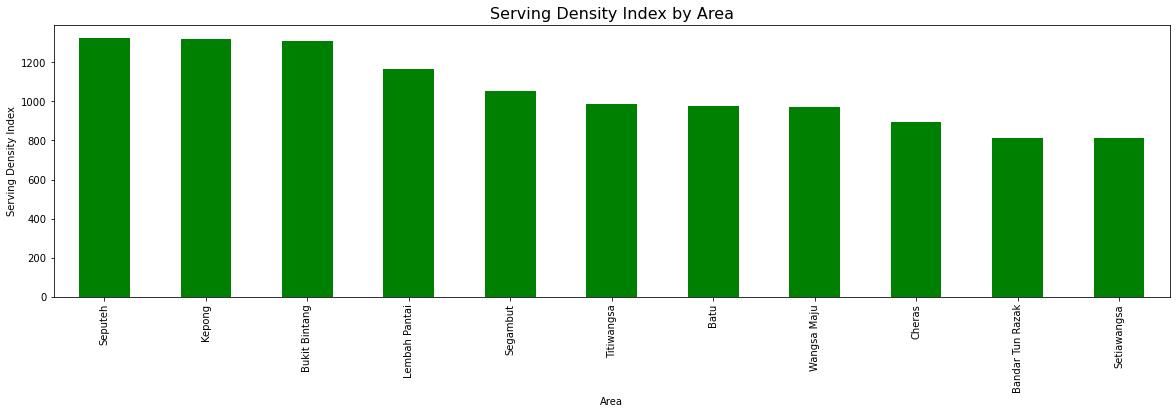

In [12]:
#Plot a bar chart showing serving density by areas in decending fashion
combine_data = combine_data.sort_values('Serving Density', ascending=False)
sd = combine_data['Serving Density']
sd.plot(kind='bar', figsize = (20, 5), color = 'green')
plt.title('Serving Density Index by Area', size=16)
plt.ylabel('Serving Density Index')
plt.show()

Based on this, we can safely conclude that Seputeh, Kepong and Bukit Bintang has the highest serving density, which translated to no of population served by a single restaurant

<b>4.2 Ranking Area by Restaurant Density Index</b><br>
We will repeat the same step for Area Size, since we've done the analysis on restaurant.

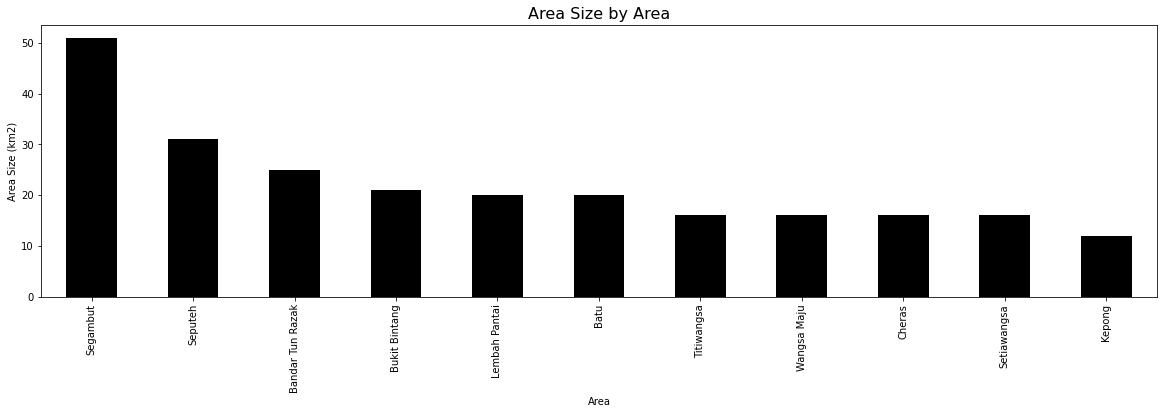

In [13]:
#Plot a bar chart showing area size by areas in decending fashion
combine_data = combine_data.sort_values('Area Size (km2)', ascending=False)
area = combine_data['Area Size (km2)']
area.plot(kind='bar', figsize = (20, 5), color ='black')
plt.title('Area Size by Area', size=16)
plt.ylabel('Area Size (km2)')
plt.show()

Based on this, Segambut, Seputeh and Bandar Tun Razak has the biggest area size for each area

<b>Lets create Restaurant Density Index</b>

In [14]:
#Calculate restaurant density by area
restaurant_density = (np.array(combine_data['No of Restaurant'])/np.array(combine_data['Area Size (km2)']))
combine_data['Restaurant Density'] = restaurant_density
combine_data

,Population,Area Size (km2),Malay,Chinese,Indian,Others,Lat,Long,Radius,Density,No of Restaurant,Serving Density,Restaurant Density
Area,,,,,,,,,,,,,
Segambut,77956,51,0.5893,0.2753,0.1177,0.0177,3.1917,101.67340,25500.0,1528.5,74,1053.459459,1.450980
Seputeh,86256,31,0.8203,0.0904,0.0787,0.0106,3.1150,101.67970,15500.0,2782.5,65,1327.015385,2.096774
Bandar Tun Razak,83650,25,0.6108,0.2910,0.0827,0.0155,3.0920,101.72110,12500.0,3346.0,103,812.135922,4.120000
Bukit Bintang,69526,21,0.1253,0.7512,0.1095,0.0140,3.1468,101.71130,10500.0,3310.8,53,1311.811321,2.523810
Lembah Pantai,80346,20,0.6212,0.1891,0.1624,0.0273,3.1225,101.66449,10000.0,4017.3,69,1164.434783,3.450000
Batu,76328,20,0.4252,0.3828,0.1764,0.0156,2.7023,101.54750,10000.0,3816.4,78,978.564103,3.900000
Titiwangsa,72136,16,0.7049,0.1730,0.0942,0.0279,3.1774,101.70770,8000.0,4508.5,73,988.164384,4.562500
Wangsa Maju,88482,16,0.5982,0.2957,0.0818,0.0243,3.2038,101.73670,8000.0,5530.1,91,972.329670,5.687500
Cheras,78819,16,0.0968,0.8293,0.0673,0.0066,3.0685,101.77040,8000.0,4926.2,88,895.670455,5.500000


Re-plotting the charts based on restaurant density (from lowest to highest)

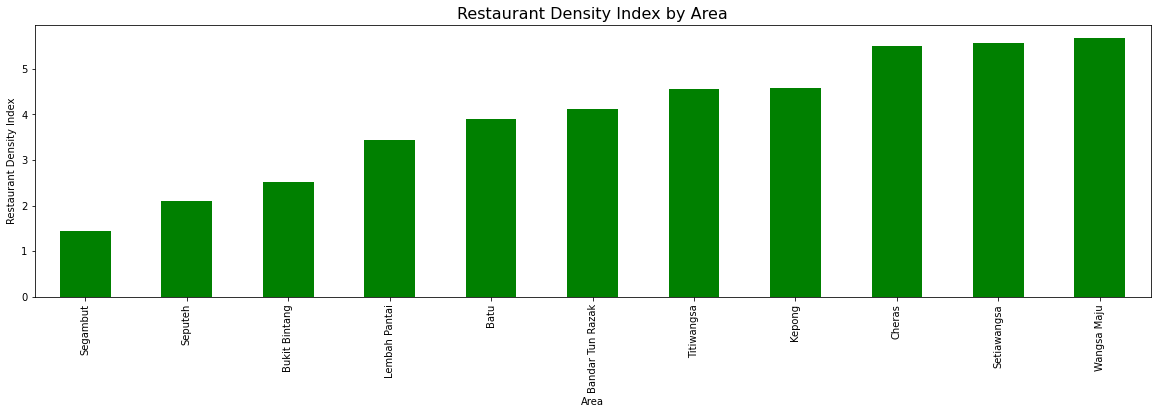

In [15]:
#Plot a bar chart showing restaurant density by areas in acending fashion
combine_data = combine_data.sort_values('Restaurant Density', ascending=True)
rd = combine_data['Restaurant Density']
rd.plot(kind='bar', figsize = (20, 5), color = 'green')
plt.title('Restaurant Density Index by Area', size=16)
plt.ylabel('Restaurant Density Index')
plt.show()

<b>4.3 Preliminary Results</b><br>
Based on the preliminary analysis, lets see the top 3 areas based on Serving Density and Restaurant Density

In [16]:
#Print top 3 Serving Density and Restaurant Density
top_sd = combine_data.sort_values('Serving Density', ascending=False)['Serving Density']
print('Top 3 by Serving Density',top_sd.head(3))
top_rd = combine_data.sort_values('Restaurant Density')['Restaurant Density']
print('\nTop 3 by Restaurant Density',top_rd.head(3))

Top 3 by Serving Density Area
Seputeh          1327.015385
Kepong           1321.745455
Bukit Bintang    1311.811321
Name: Serving Density, dtype: float64

Top 3 by Restaurant Density Area
Segambut         1.450980
Seputeh          2.096774
Bukit Bintang    2.523810
Name: Restaurant Density, dtype: float64


From the data above, we know that based on '**highest Serving Density**', top 3 area with high demand are Seputeh, Kepong and Bukit Bintang with 1 restaurant per ~1300 person.

On the other hand, based on '**lowest Restaurant Density**', top 3 area are Segambut, Seputeh and Bukit Bintang with 1-2.5 restaurant per km2.

<b>4.4 Ranking Areas based on both 'Serving Density' and 'Restaurant Density'</b><br>
Next, we will combine the index to rank the area to find the most preferable area that give highest demand with lowest competitors

In [17]:
#Rank area by Serving Density and Restaurant Density
index = (np.array(combine_data['Serving Density'])*np.array(combine_data['Restaurant Density']))
combine_data['Index'] = index
combine_data

,Population,Area Size (km2),Malay,Chinese,Indian,Others,Lat,Long,Radius,Density,No of Restaurant,Serving Density,Restaurant Density,Index
Area,,,,,,,,,,,,,,
Segambut,77956,51,0.5893,0.2753,0.1177,0.0177,3.1917,101.67340,25500.0,1528.5,74,1053.459459,1.450980,1528.549020
Seputeh,86256,31,0.8203,0.0904,0.0787,0.0106,3.1150,101.67970,15500.0,2782.5,65,1327.015385,2.096774,2782.451613
Bukit Bintang,69526,21,0.1253,0.7512,0.1095,0.0140,3.1468,101.71130,10500.0,3310.8,53,1311.811321,2.523810,3310.761905
Lembah Pantai,80346,20,0.6212,0.1891,0.1624,0.0273,3.1225,101.66449,10000.0,4017.3,69,1164.434783,3.450000,4017.300000
Batu,76328,20,0.4252,0.3828,0.1764,0.0156,2.7023,101.54750,10000.0,3816.4,78,978.564103,3.900000,3816.400000
Bandar Tun Razak,83650,25,0.6108,0.2910,0.0827,0.0155,3.0920,101.72110,12500.0,3346.0,103,812.135922,4.120000,3346.000000
Titiwangsa,72136,16,0.7049,0.1730,0.0942,0.0279,3.1774,101.70770,8000.0,4508.5,73,988.164384,4.562500,4508.500000
Kepong,72696,12,0.0455,0.8876,0.0603,0.0066,3.2140,101.63560,6000.0,6058.0,55,1321.745455,4.583333,6058.000000
Cheras,78819,16,0.0968,0.8293,0.0673,0.0066,3.0685,101.77040,8000.0,4926.2,88,895.670455,5.500000,4926.187500


Re-plotting the charts based on Index

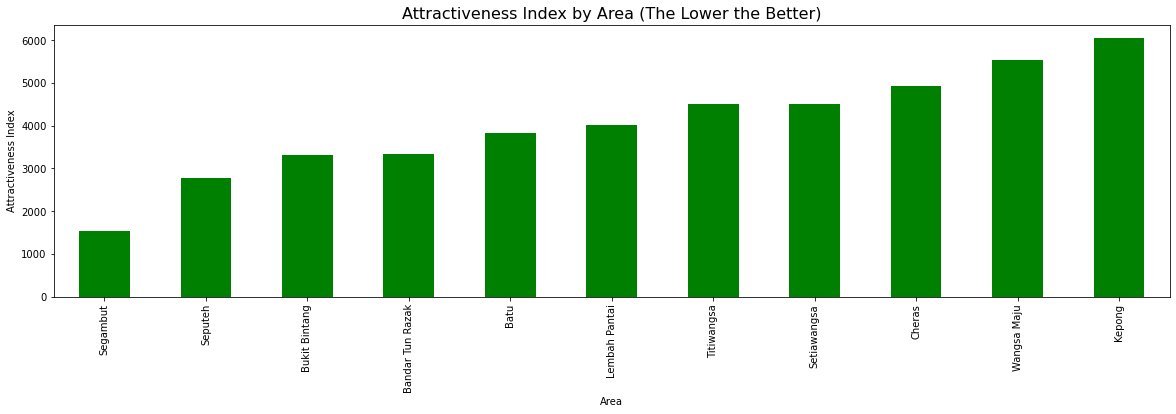

In [18]:
#Plot a bar chart showing restaurant density by areas in acending fashion
combine_data = combine_data.sort_values('Index', ascending=True)
idx = combine_data['Index']
idx.plot(kind='bar', figsize = (20, 5), color = 'green')
plt.title('Attractiveness Index by Area (The Lower the Better)', size=16)
plt.ylabel('Attractiveness Index')
plt.show()

Lets visualize the area in the map

In [20]:
#Import Folium
import folium
print('Folium imported!')

Folium imported!


In [21]:
# Kuala Lumpur latitude and longitude values
latitude = 3.1390
longitude = 101.6869

# create map and display it
kl_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
kl_map

<img src='https://i.imgur.com/Wgxoa39.jpg'>

Add a marker for the locations

In [26]:
# instantiate a feature group for the location in the dataframe
locations = folium.map.FeatureGroup()

# loop through the location
for lat, lng, in zip(combine_data.Lat, combine_data.Long):
    locations.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=20,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add location to map
kl_map.add_child(locations)

<img src='https://i.imgur.com/cN8vaac.jpg'>

<h3>5.0 Result & Discussion</h3>

Our analysis shows that the top 3 areas that have the highest no of population is Wangsa Maju, Seputeh and Bandar Tun Razak, which indicate there is a high demand in these areas. We then calculate the no of restaurant in all areas and identify that Bukit Bintang, Kepong and Seputeh has the lowest no of restaurant in this area. Using this information, we created a '**serving density index**' which give us the areas that have highest population per restaurant. This translate into areas that will give us the highest demand after taking into consideration no of population and no of restaurant in respective areas.<br>

Next, we want to look at the competition in each areas. To do this, we compare area size and no of restaurant in each area, and created '**restaurant density index**' which allow us to see how are the distribution of competition in each area. Based on this analysis, we get the top 3 location which are Segambut, Seputeh and Bukit bintang with 1.4, 2.09 and 2.5 restaurant per km respectively. This indicate that these areas has lower competition as no of restaurant per km is low.<br>

Using both analysis above, we created '**attractiveness index**' for each location. And based on this, we see that the top 3 attractive location to open up a restaurant will be Segambut, Seputeh and Bukit Bintang. These areas has relatively high demand and low competition. With this, restaurant operator / food entrepreneur can use this information to make decision on areas that will be attractive to start up a restaurant that will maximize sales (due to high demand) and minimize risk (due to lower competition). 

<h3>6.0 Conclusion</h3>

The purpose of this project was to identify Kuala Lumpur areas with high demand(using population) and low number of restaurants per km in order to aid stakeholders in narrowing down the search for optimal location for a new restaurant. By calculating serving density index we have first identified general areas that have high demand, and then calculating restaurant density index to look for areas with low no of competitor. Both analysis is then combined to look for the areas that have the best attractiveness index and these areas were created to be used as starting points for final exploration by stakeholders.

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and locations in every recommended zone, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.